In [41]:
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [42]:
rootdir = os.fsdecode('agent_code/my_agent/Training_data/statistics')

stat_files = []

for file in os.listdir(rootdir):
    stat_files.append(os.fsdecode(rootdir + '/' + file))
    
print(stat_files)
raw_stats = []
for file in stat_files:
    raw_stats.append(pickle.load(open(file, 'rb')))

['agent_code/my_agent/Training_data/statistics/001_statistics.txt', 'agent_code/my_agent/Training_data/statistics/002_statistics.txt', 'agent_code/my_agent/Training_data/statistics/003_statistics.txt', 'agent_code/my_agent/Training_data/statistics/004_statistics.txt', 'agent_code/my_agent/Training_data/statistics/005_statistics.txt', 'agent_code/my_agent/Training_data/statistics/006_statistics.txt', 'agent_code/my_agent/Training_data/statistics/007_statistics.txt', 'agent_code/my_agent/Training_data/statistics/008_statistics.txt', 'agent_code/my_agent/Training_data/statistics/009_statistics.txt']


In [43]:
scores, survived, reward, time, steps = {}, {}, {}, {}, {}

statistics = {}

N_gen = 100*int(stat_files[0][45]) + 10*int(stat_files[0][46]) + int(stat_files[0][47])

for gen in raw_stats:
    gen_score, gen_survived, gen_reward, gen_time, gen_steps = np.array([]), np.array([]), np.array([]), np.array([]), np.array([])

    for ep in gen[0]:
        gen_score = np.append(gen_score, ep['score'])
        # gen_survived = np.append(gen_survived, ep['alive'])
        if ep['steps'] < 400:
            gen_survived = np.append(gen_survived, False)
        gen_reward = np.append(gen_reward, ep['reward'])
        gen_time = np.append(gen_time, ep['mean_time'])
        gen_steps = np.append(gen_steps, ep['steps'])
    
    scores[N_gen] = gen_score
    survived[N_gen] = gen_survived
    reward[N_gen] = gen_reward
    time[N_gen] = gen_time
    steps[N_gen] = gen_steps
    N_gen += 1



[1, 2, 3, 4, 5, 6, 7, 8, 9] [0.0011, 0.0578, 0.0557, 0.0396, 0.0381, 0.0414, 0.029, 0.0399, 0.0337]


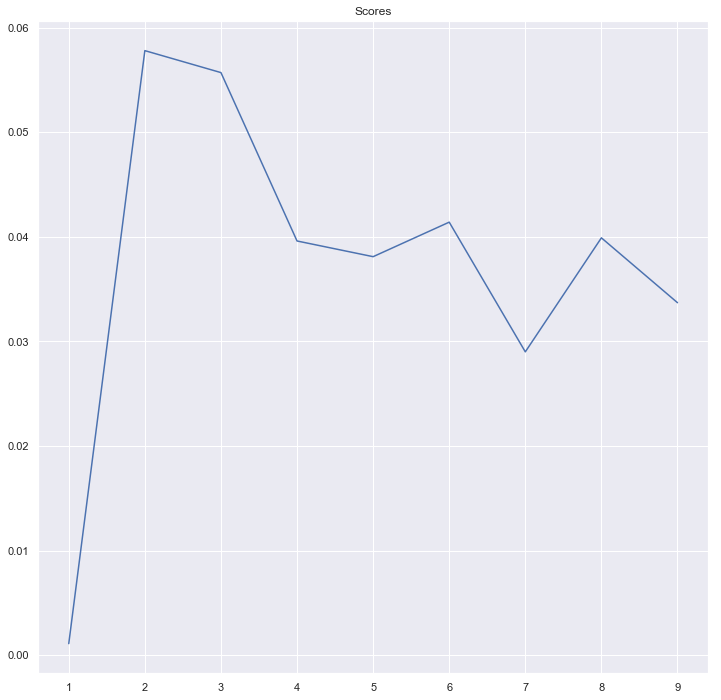

In [44]:
plt.figure(figsize=(12,12))
plt.title('Scores')
y_avg_scores = []
x_gen = []
for gen, sc in scores.items():
    x_gen.append(gen)
    y_avg_scores.append(np.mean(sc))
print(x_gen, y_avg_scores)
plt.plot(x_gen, y_avg_scores, label='gen_1')
plt.show()

[1, 2, 3, 4, 5, 6, 7, 8, 9] [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


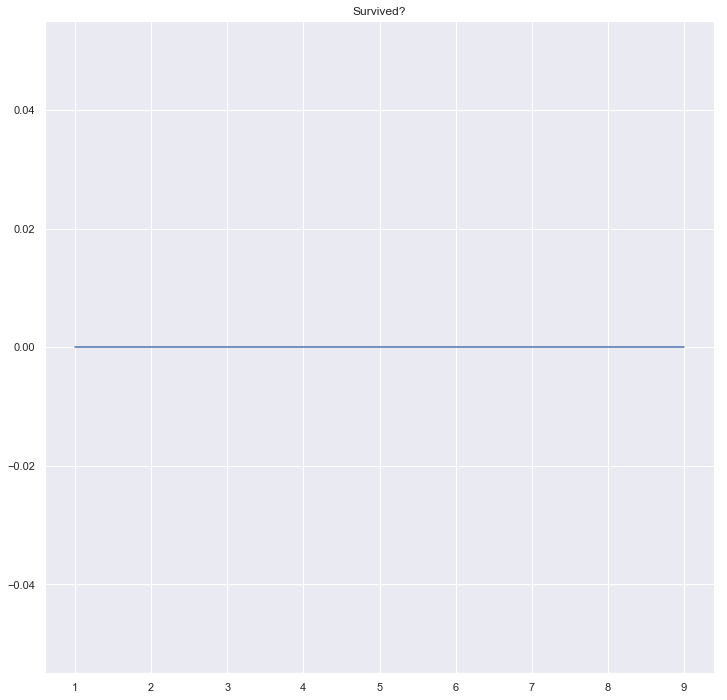

In [45]:
#scores, survived, reward, time, steps
plt.figure(figsize=(12,12))
plt.title('Survived?')
y_avg_survived = []
x_gen = []
for gen, sc in survived.items():
    x_gen.append(gen)
    y_avg_survived.append(np.mean(sc))
print(x_gen, y_avg_survived)
plt.plot(x_gen, y_avg_survived, label='gen_1')
plt.show()

[1, 2, 3, 4, 5, 6, 7, 8, 9] [-5561.0384, -4506.8336, -4580.2251, -4532.1372, -4545.6874, -4543.9613, -4558.2489, -4553.6415, -4540.7126]


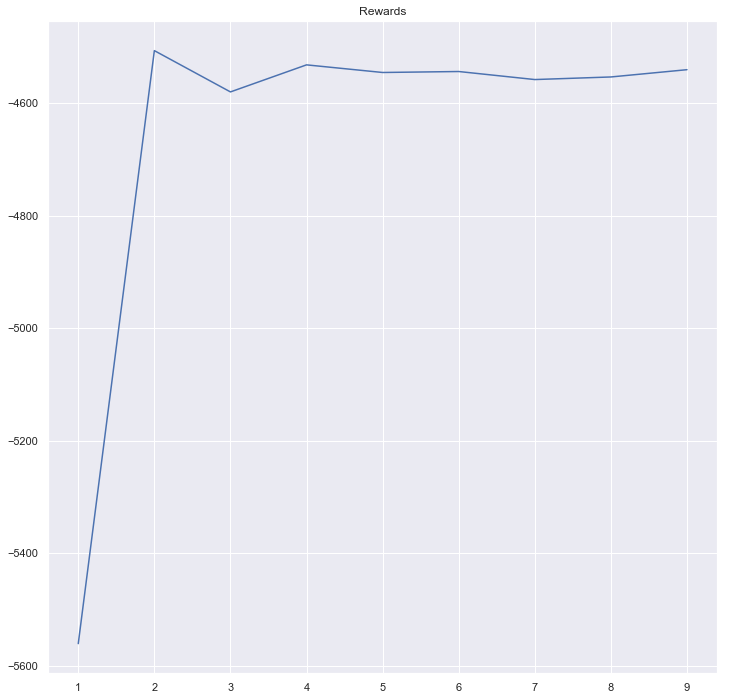

In [46]:
#scores, survived, reward, time, steps
plt.figure(figsize=(12,12))
plt.title('Rewards')
y_avg_rewards = []
x_gen = []
for gen, rew in reward.items():
    x_gen.append(gen)
    y_avg_rewards.append(np.mean(rew))
print(x_gen, y_avg_rewards)
plt.plot(x_gen, y_avg_rewards, label='gen_1')
plt.show()

[1, 2, 3, 4, 5, 6, 7, 8, 9] [16.676, 26.4283, 25.7245, 23.4756, 23.0155, 23.544, 22.3274, 24.5943, 22.2682]


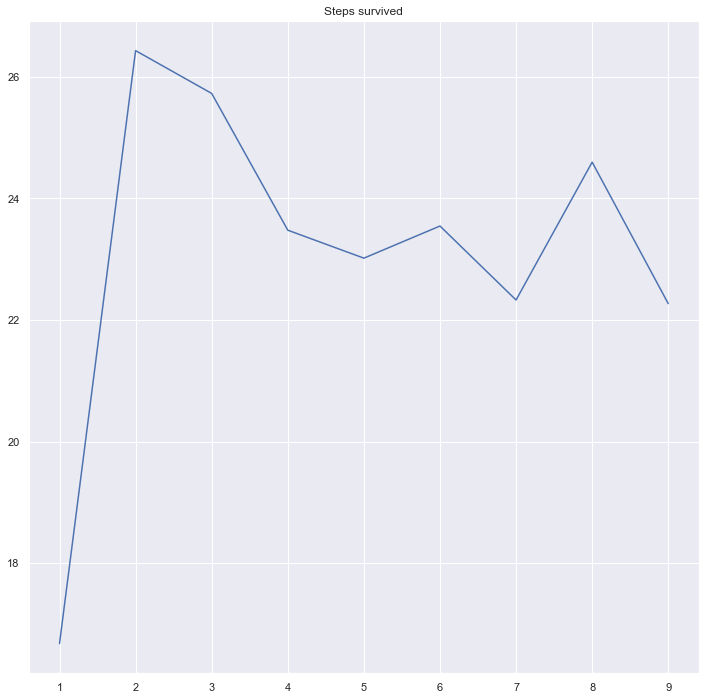

In [47]:
#scores, survived, reward, time, steps
plt.figure(figsize=(12,12))
plt.title('Steps survived')
y_avg_steps = []
x_gen = []
for gen, step in steps.items():
    x_gen.append(gen)
    y_avg_steps.append(np.mean(step))
print(x_gen, y_avg_steps)
plt.plot(x_gen, y_avg_steps, label='gen_1')
plt.show()

In [48]:
rootdir = os.fsdecode('agent_code/my_agent/Training_data/trees')

stat_files = []

for file in os.listdir(rootdir):
    stat_files.append(os.fsdecode(rootdir + '/' + file))
    
print(stat_files[-5])
regressor_BOMB = pickle.load(open(stat_files[-6], 'rb'))
regressor_DOWN = pickle.load(open(stat_files[-5], 'rb'))
regressor_LEFT = pickle.load(open(stat_files[-4], 'rb'))
regressor_RIGHT = pickle.load(open(stat_files[-3], 'rb'))
regressor_UP = pickle.load(open(stat_files[-2], 'rb'))
regressor_WAIT = pickle.load(open(stat_files[-1], 'rb'))
print('regressors loaded')

agent_code/my_agent/Training_data/trees/009_DOWN.txt
regressors loaded


C:\Users\karlt\Anaconda3\envs\ml_homework\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\karlt\Anaconda3\envs\ml_homework\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\karlt\Anaconda3\envs\ml_homework\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\karlt\Anaconda3\envs\ml_homework\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from vers

In [49]:
print(np.argsort(regressor_BOMB.feature_importances_))
print(np.argsort(regressor_WAIT.feature_importances_))

[531 173 174 329 176 177 327 324 180 321 320 183 318 317 186 315 314 189
 312 191 192 311 194 195 309 197 198 308 200 201 330 171 170 332 273 138
 351 141 348 143 144 345 146 147 342 149 150 152 203 153 155 156 338 158
 159 336 161 162 335 164 165 333 167 168 339 204 306 206 242 243 288 245
 246 287 248 249 285 251 252 284 254 255 290 257 282 260 261 281 263 264
 280 266 267 279 269 270 276 272 258 357 240 291 207 305 209 210 303 212
 213 302 215 216 300 218 219 299 239 221 297 224 225 296 227 228 294 230
 231 293 233 234 236 237 222 135 354  67 446 444  40  43 441 440  46 438
  48 437  51 435 456 434  56  57 432  59 431 429 426 423 358 420 411 408
  54 460 465 467   1 526 523   4 510 507 506 504 501 498 492  15 487  17
  18 484  20  21 481  24 476  26  27 473 471 470 468 407 405 275 401  96
 390  98  99 387 365 120 102 384 381 402 105 380 366 378 109 377 375 374
 372 371 370 368 369 122  95  93  78 132 399 360 398 362 129  81 393 128
  84 117 396 395  87 126  89 125  90 123  92 363 50

In [50]:
import numpy as np

tester = np.arange(5)
gammas = 0.9**np.arange(tester.shape[0])
output = []
for y in range(tester.shape[0]):
    output.append(np.sum(tester[y:]*gammas[:tester.shape[0]-y]))

print (tester)
print (output)
print (0.9+0.9**2*2+0.9**3*3+0.9**4*4)

[0 1 2 3 4]
[7.3314, 8.146, 7.94, 6.6, 4.0]
7.3314
